# Process of results

First some imports

In [131]:
import os
import os.path

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

Next, we read all finalized CSV files from the given `input_directory`:

In [132]:
input_directory = Path("./results/pretrain")
output_directory = Path("./results/pretrain")

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=[],
    exclude=[],
    files=[
        "./results/pretrain/res-0.csv",
        "./results/pretrain/res-1.csv",
        "./results/pretrain/res-2.csv",
        "./results/cg/total_results_cg.csv"
    ]
)
df_copy = df.copy()

Let's look at the initial result

In [133]:
df = df.loc[(df["sample_domain"] == "[3.0, 5.0]") & (df["ground_truth"] == "polyhedral")]
df

,sample,pretrained_model,output_folder,run_id,plotting_points,seed,ground_truth,low_resolution,loss,batch_size,...,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,Unnamed: 0
0,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,0,2500,3,polyhedral,False,normalized_L1_loss,1000,...,0.000061,0.096599,0.126326,0.540285,0.221150,0.202954,0.216351,1.215290,0.418621,NaN
1,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,1,2500,3,polyhedral,False,normalized_L1_loss,1000,...,0.003516,0.615510,0.775692,2.353733,1.087862,0.709990,0.773686,2.422745,0.881652,NaN
2,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,2,2500,3,polyhedral,False,normalized_L1_loss,1000,...,0.000462,0.581420,0.732864,2.254805,0.999200,0.665124,0.722879,2.319343,0.844033,NaN
3,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,3,2500,3,polyhedral,False,normalized_L1_loss,1000,...,0.000029,0.092022,0.118712,0.619743,0.252369,0.202321,0.216283,1.239026,0.441554,NaN
4,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,4,2500,3,polyhedral,False,normalized_L1_loss,1000,...,0.009656,0.599718,0.759608,2.192614,0.940517,0.753959,0.808836,2.583756,0.911978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,churyumov-gerasimenko,NaN,results/polyhedral-total-cg-adaptive-noise-0,20,2500,7,polyhedral,False,normalized_L1_loss,1000,...,0.000086,0.678743,0.848231,2.611022,1.214138,0.651421,0.705463,2.374024,0.863213,380.0
511,churyumov-gerasimenko,NaN,results/polyhedral-total-cg-adaptive-noise-1,2,2500,42,polyhedral,False,normalized_L1_loss,1000,...,0.000137,0.625766,0.782038,2.476163,1.156151,0.614380,0.663245,2.285798,0.827850,385.0
514,churyumov-gerasimenko,NaN,results/polyhedral-total-cg-adaptive-noise-1,5,2500,42,polyhedral,False,normalized_L1_loss,1000,...,0.000022,0.664617,0.830064,2.588429,1.240174,0.606683,0.656194,2.241763,0.805726,388.0
517,churyumov-gerasimenko,NaN,results/polyhedral-total-cg-adaptive-noise-1,8,2500,42,polyhedral,False,normalized_L1_loss,1000,...,0.000062,0.621885,0.772812,2.502898,1.183348,0.592865,0.637783,2.287359,0.827263,391.0


# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we rember the used altitudes for validation.

In [134]:
interesting_columns = ["pretrained_model", "sample_domain", "sample", "noise"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]
df["pretrained_model"].fillna("None", inplace=True)
df.loc[df['pretrained_model'] != "None", "pretrained_model"] = "Pretrained"
df

,pretrained_model,sample_domain,sample,noise,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9
0,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,[''],0.646968,0.847598,0.376243,0.145501,0.110315,0.093120,0.009174,0.000551,0.000290,0.000061
1,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 0.146731]",1.057210,0.913345,0.849222,0.785677,0.761232,0.452826,0.261400,0.033281,0.017173,0.003516
2,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 1.467314]",0.903227,1.140363,0.846930,0.811558,1.010742,0.442023,0.219081,0.008231,0.003088,0.000462
3,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,"['constant_bias', [0.000272, 0.0, 0.0]]",0.429071,0.375304,0.639973,0.132235,0.098531,0.062991,0.006799,0.000268,0.000140,0.000029
4,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.913201,0.963369,1.015123,0.839400,0.799049,0.686624,0.553416,0.089363,0.046826,0.009656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,None,"[3.0, 5.0]",churyumov-gerasimenko,"['adaptive_gaussian_noise', 0.1]",1.281330,0.803667,0.878052,0.827414,1.111193,0.439520,0.189924,0.002202,0.000629,0.000086
511,None,"[3.0, 5.0]",churyumov-gerasimenko,"['adaptive_gaussian_noise', 0.1]",0.698499,1.494906,0.809530,0.625553,0.654260,0.434823,0.169270,0.001964,0.000744,0.000137
514,None,"[3.0, 5.0]",churyumov-gerasimenko,"['adaptive_gaussian_noise', 0.01]",1.436545,0.905010,0.818915,0.722819,0.695235,0.306068,0.032386,0.000419,0.000146,0.000022
517,None,"[3.0, 5.0]",churyumov-gerasimenko,"['adaptive_gaussian_noise', 0.001]",0.697504,1.057819,0.738157,0.610380,1.116027,0.343793,0.048537,0.000659,0.000303,0.000062


In [135]:
ALTITUDES = ast.literal_eval(df_copy.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)
print(unit_conversion.convert_altitude("churyumov-gerasimenko", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 3.12660645  9.37981934 15.63303223]


Time to replace the altitudes and make them more readable:

In [136]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)

,pretrained_model,sample_domain,sample,noise,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,[''],0.646968,0.847598,0.376243,0.145501,0.110315,0.093120,0.009174,0.000551,0.000290,0.000061
1,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 0.146731]",1.057210,0.913345,0.849222,0.785677,0.761232,0.452826,0.261400,0.033281,0.017173,0.003516
2,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,"['gaussian', 0.0, 1.467314]",0.903227,1.140363,0.846930,0.811558,1.010742,0.442023,0.219081,0.008231,0.003088,0.000462
3,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,"['constant_bias', [0.000272, 0.0, 0.0]]",0.429071,0.375304,0.639973,0.132235,0.098531,0.062991,0.006799,0.000268,0.000140,0.000029
4,Pretrained,"[3.0, 5.0]",churyumov-gerasimenko,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.913201,0.963369,1.015123,0.839400,0.799049,0.686624,0.553416,0.089363,0.046826,0.009656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,None,"[3.0, 5.0]",churyumov-gerasimenko,"['adaptive_gaussian_noise', 0.1]",1.281330,0.803667,0.878052,0.827414,1.111193,0.439520,0.189924,0.002202,0.000629,0.000086
511,None,"[3.0, 5.0]",churyumov-gerasimenko,"['adaptive_gaussian_noise', 0.1]",0.698499,1.494906,0.809530,0.625553,0.654260,0.434823,0.169270,0.001964,0.000744,0.000137
514,None,"[3.0, 5.0]",churyumov-gerasimenko,"['adaptive_gaussian_noise', 0.01]",1.436545,0.905010,0.818915,0.722819,0.695235,0.306068,0.032386,0.000419,0.000146,0.000022
517,None,"[3.0, 5.0]",churyumov-gerasimenko,"['adaptive_gaussian_noise', 0.001]",0.697504,1.057819,0.738157,0.610380,1.116027,0.343793,0.048537,0.000659,0.000303,0.000062


In [137]:
unit_conversion.convert_altitude("churyumov-gerasimenko", np.array(ALTITUDES), unit='m')

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [138]:
df.groupby(["noise", "pretrained_model"]).mean()

0.001  \
noise                                             pretrained_model             
['']                                              None              0.936926   
                                                  Pretrained        0.773919   
['adaptive_gaussian_noise', 0.001]                None              0.824685   
                                                  Pretrained        0.596998   
['adaptive_gaussian_noise', 0.01]                 None              1.250930   
                                                  Pretrained        0.549689   
['adaptive_gaussian_noise', 0.1]                  None              1.055168   
                                                  Pretrained        0.832910   
['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] None              1.172893   
                                                  Pretrained        1.180676   
['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] None              1.399130   
                                                  Pretrained        1.279238   
['constant_bias', [0.000272, 0.0, 0.0]]           None              1.032776   
                                                  Pretrained        0.539808   
['gaussian', 0.0, 0.146731]                       None              1.221663   
                                                  Pretrained        1.200998   
['gaussian', 0.0, 1.467314]                       None              1.410946   
                                                  Pretrained        1.254721   

                                                                       0.005  \
noise                                             pretrained_model             
['']                                              None              0.910341   
                                                  Pretrained        0.528871   
['adaptive_gaussian_noise', 0.001]                None              0.986532   
                                                  Pretrained        0.597676   
['adaptive_gaussian_noise', 0.01]                 None              0.891810   
                                                  Pretrained        0.531853   
['adaptive_gaussian_noise', 0.1]                  None              0.946944   
                                                  Pretrained        0.767734   
['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] None              1.122895   
                                                  Pretrained        1.293992   
['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]] None              1.374645   
                                                  Pretrained        1.251353   
['constant_bias', [0.000272, 0.0, 0.0]]           None              0.938072   
                                                  Pretrained        0.537844   
['gaussian', 0.0, 0.146731]                       None              1.168851   
                                                  Pretrained        1.166377   
['gaussian', 0.0, 1.467314]                       None              1.365542   
                                                  Pretrained        1.276395   

                                                                        0.01  \
noise                                             pretrained_model             
['']                                              None              0.836092   
                                                  Pretrained        0.387067   
['adaptive_gaussian_noise', 0.001]                None              0.837054   
                                                  Pretrained        0.462182   
['adaptive_gaussian_noise', 0.01]                 None              0.787430   
                                                  Pretrained        0.413294   
['adaptive_gaussian_noise', 0.1]                  None              0.785601   
                                                  Pretrained        0.560479   
['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]] None              1

Time for plotting. First make the DataFrame wide

In [139]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["pretrained_model", "noise"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,pretrained_model,noise,distance,relRMSE
0,Pretrained,[''],0.001,0.646968
1,Pretrained,"['gaussian', 0.0, 0.146731]",0.001,1.057210
2,Pretrained,"['gaussian', 0.0, 1.467314]",0.001,0.903227
3,Pretrained,"['constant_bias', [0.000272, 0.0, 0.0]]",0.001,0.429071
4,Pretrained,"['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",0.001,0.913201
...,...,...,...,...
1935,None,"['adaptive_gaussian_noise', 0.1]",50.000,0.000086
1936,None,"['adaptive_gaussian_noise', 0.1]",50.000,0.000137
1937,None,"['adaptive_gaussian_noise', 0.01]",50.000,0.000022
1938,None,"['adaptive_gaussian_noise', 0.001]",50.000,0.000062


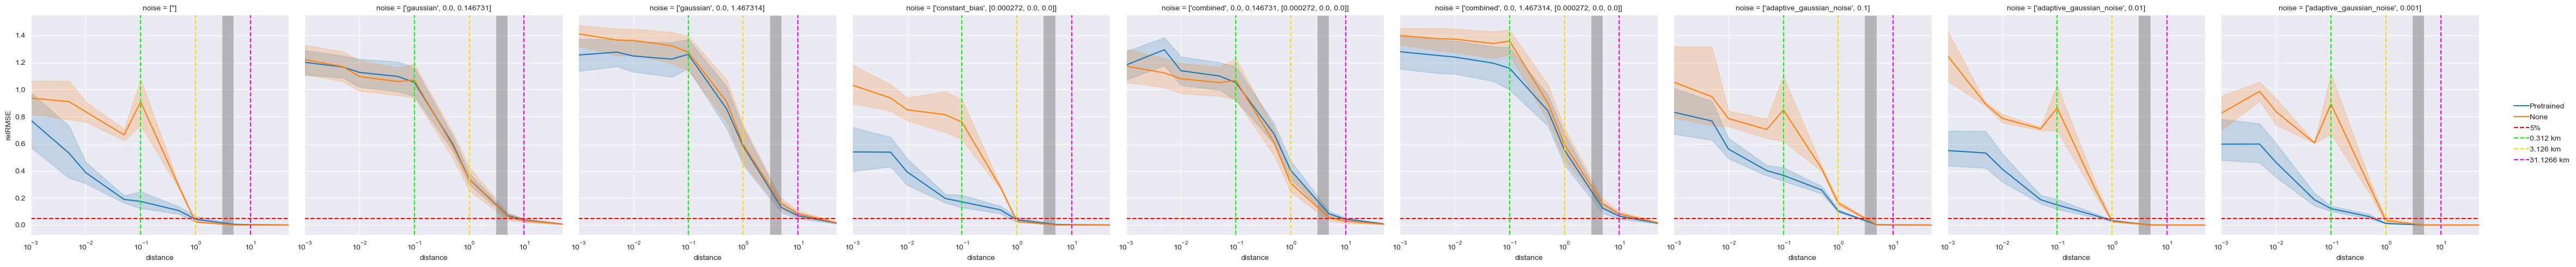

In [140]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="noise",
    hue="pretrained_model"
)
g.set(xlim=(0.001, 50.0), xscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[0,:]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"cg_pretrain_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

In [141]:
csv_reader.read_result_csv(
    input_directory,
    include=[],
    exclude=[],
    files=[
        "./results/pretrain/res-0.csv"
    ]
)

,sample,pretrained_model,output_folder,run_id,plotting_points,seed,ground_truth,low_resolution,loss,batch_size,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,0,2500,3,polyhedral,False,normalized_L1_loss,1000,...,2.381574e-08,0.000061,0.096599,0.126326,0.540285,0.221150,0.202954,0.216351,1.215290,0.418621
1,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,1,2500,3,polyhedral,False,normalized_L1_loss,1000,...,1.371360e-06,0.003516,0.615510,0.775692,2.353733,1.087862,0.709990,0.773686,2.422745,0.881652
2,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,2,2500,3,polyhedral,False,normalized_L1_loss,1000,...,1.802508e-07,0.000462,0.581420,0.732864,2.254805,0.999200,0.665124,0.722879,2.319343,0.844033
3,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,3,2500,3,polyhedral,False,normalized_L1_loss,1000,...,1.149877e-08,0.000029,0.092022,0.118712,0.619743,0.252369,0.202321,0.216283,1.239026,0.441554
4,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,4,2500,3,polyhedral,False,normalized_L1_loss,1000,...,3.766798e-06,0.009656,0.599718,0.759608,2.192614,0.940517,0.753959,0.808836,2.583756,0.911978
5,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,5,2500,3,polyhedral,False,normalized_L1_loss,1000,...,1.065416e-07,0.000273,0.632850,0.794199,2.428258,1.110240,0.710288,0.771335,2.455185,0.892013
6,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,6,2500,3,polyhedral,False,normalized_L1_loss,1000,...,7.730507e-08,0.000198,0.373421,0.472561,1.889996,0.968678,0.366439,0.395128,1.649577,0.591640
7,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,7,2500,3,polyhedral,False,normalized_L1_loss,1000,...,8.343738e-09,0.000021,0.079461,0.101913,0.538452,0.220237,0.181168,0.191173,1.153499,0.389243
8,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,8,2500,3,polyhedral,False,normalized_L1_loss,1000,...,1.473564e-08,0.000038,0.067781,0.086699,0.460940,0.194742,0.196591,0.208119,1.273213,0.447539
9,churyumov-gerasimenko,./results/pretrain-0/churyumov-gerasimenko/pol...,results/posttrain-0,9,2500,3,polyhedral,False,normalized_L1_loss,1000,...,4.295747e-08,0.000110,0.090130,0.115627,0.531156,0.222899,0.174187,0.185169,1.058978,0.364875
